In [1]:
from maelzel.core import *

In [2]:
struct = ScoreStruct(r'''
3/16, 100; 2/16; 3/16; 4/16; 2/16; 3/16; 5/16; 4/16; 5/16; 6/16; 4/16, barline=double
2/16; 4/16; 3/16; 7/16; 2/16; 4/16; 4/16; 5/16; 4/16; 8/16; 4/16, barline=double
3/16; 2/16; 5/16; 6/16; 4/16; 3/16; 4/16; 5/16; 3/16; 6/16; 3/16, barline=double
6/16; 3/16; 4/16; 5/16; 2/16; 3/16; 4/16; 5/16; 8/16; 4/16; 6/16, barline=double
2/16; 3/16; 5/16; 4/16; 3/16; 2/16; 5/16; 2/16; 3/16; 6/16; 2/16, barline=double
3/16; 3/16; 3/16; 3/16; 2/16; 3/16; 4/16; 5/16; 4/16; 8/16; 2/16; 3/16; 4/16; 3/16; 3/16; 3/16; 4/16; 4/16, barline=double

''')

setScoreStruct(struct)

Chain([4G:0.375♩:gliss=True, 4B:0.125♩, Rest:0.25♩, 4G:0.25♩:gliss=True, 4B:0.25♩, 4G:0.375♩:gliss=True, 4B:0.125♩, Rest:0.25♩, 4F#:0.75♩, Rest:0.25♩, …])
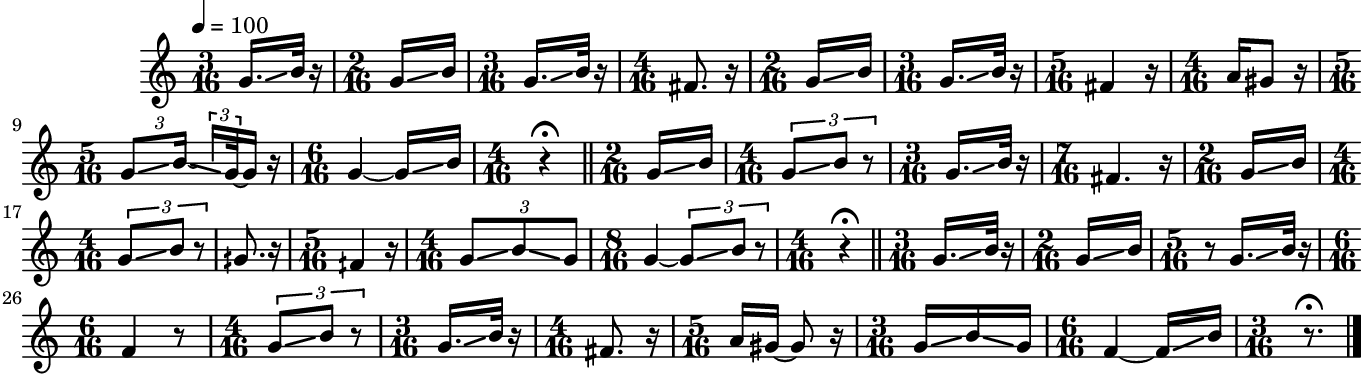

In [3]:
ch = Chain([
    "4G:3/8:gliss", "4B/32", "R/16",
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/8.", "R/16",
    
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/4", "R/16",
    
    "4A/16", "4G#/8", "R/16",
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3", "R/16",
    "4G~:1", "4G/16:gliss", "4B/16",
    
    Rest(1).addSymbol('fermata'),
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#:1.5", "r/16",
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    "4G+:3/4", "r/16",
    "4F+:1", "r/16",
    
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3",
    "4G~:1", "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    Rest(1).addSymbol('fermata'),

    "4G:3/8:gliss", "4B/32", "R/16",
    "4G/16:gliss", "4B/16",
    "r/8", "4G:.375:gliss", "4B/32", "R/16",
    "4F/4", "R/8",

    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    "4G:3/8:gliss", "4B/32", "R/16",
    "4F#/8.", "R/16",

    "4A/16", "4G#/8.", "R/16",

    "4G/16:gliss", "4B/16:gliss", "4G/16",
    "4F~/4", "4F/16:gliss", "4B/16",
    Rest("3/4").addSymbol('fermata')
    
])
ch

Chain([4G:0.375♩:gliss=True:symbols=[Slur(anchor=ref(Note), kind=start, linetype=solid, partnerSpanner=ref(Slur), uuid=5tym2vy0)], 4B:0.125♩:symbols=[Slur(anchor=ref(Note), kind=end, linetype=solid, partnerSpanner=ref(Slur), uuid=5tym2vy0)], Rest:0.25♩, 4G:0.25♩:gliss=True:symbols=[Slur(anchor=ref(Note), kind=start, linetype=solid, partnerSpanner=ref(Slur), uuid=wqm5rnal)], 4B:0.25♩:symbols=[Slur(anchor=ref(Note), kind=end, linetype=solid, partnerSpanner=ref(Slur), uuid=wqm5rnal)], 4G:0.375♩:gliss=True:symbols=[Slur(anchor=ref(Note), kind=start, linetype=solid, partnerSpanner=ref(Slur), uuid=t0b8tbtv)], 4B:0.125♩:symbols=[Slur(anchor=ref(Note), kind=end, linetype=solid, partnerSpanner=ref(Slur), uuid=t0b8tbtv)], Rest:0.25♩, 4F#:0.75♩:symbols=[Articulation(kind=tenuto)], Rest:0.25♩, …])
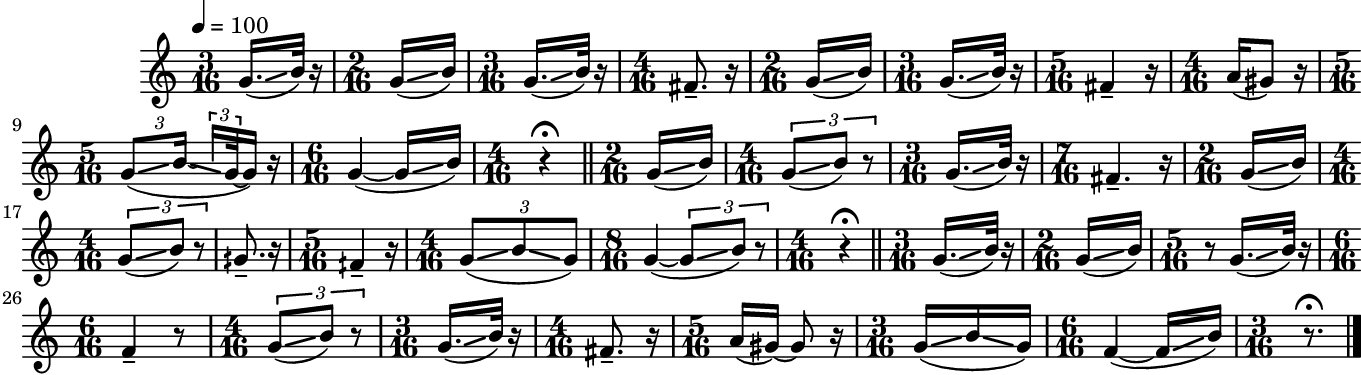

In [4]:
# Add slurs and articulations

ch2 = ch.copy()
for i in range(struct.numMeasures()):
    events = ch2.eventsBetween((i, 0), (i+1, 0))
    if not events or all(ev.isRest() for ev in events):
        continue
    firstev = next(ev for ev in events if not ev.isRest())
    lastev = next(ev for ev in reversed(events) if not ev.isRest())
    if firstev is not lastev:
        firstev.addSpanner('slur', endobj=lastev)
        firstev.setPlay(args=dict(kx=0, ky=0))
    else:
        firstev.addSymbol('tenuto')
        firstev.setPlay(args=dict(kx=0, ky=1))
ch2
    

In [5]:
# legatos
for loc in [(7, 0), (29, 0)]:
    ch2.eventAt(loc).setPlay(glisstime=0.1)

# shorten end gliss
for loc in [(19, F(2,3)), (30, 1/2)]:
    ch2.eventAt(loc).setPlay(end=0.1)
    

In [6]:
ch2.play(instr='.sing', args={'ivibstart': 0.25, 'kvibfreq': 5.5})




--Csound version 6.19 (double samples) Oct 30 2023
[commit: 79e5d31bea441e5289073319ab2b1e42d01814b9]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 512 sample-frame blocks
reading 4096-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=30)
    Synth(𝍪 preset:.sing=501.0002 start=0.842 dur=0.300 p4=0.5 kpos=1 kgain=21 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=67 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0003 start=1.292 dur=0.300 p4=0.5 kpos=1 kgain=21 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=67 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0004 start=1.592 dur=0.300 p4=0.5 kpos=1 kgain=21 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=67 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0005 start=2.042 dur=0.450 p4=0.5 kpos=1 kgain=21 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=1 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=66 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0006 start=2.642 dur=0.300 p4=0.5 kpos=1 kgain=21 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=67 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0007 start=2.942 dur=0.300 p4=0.5 kpos=1 kgain=21 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=67 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0008 start=3.392 dur=0.600 p4=0.5 kpos=1 kgain=21 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=1 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=66 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0009 start=4.142 dur=0.450 p4=0.5 kpos=1 kgain=21 idataidx_=4 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=69 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.001 start=4.742 dur=0.600 p4=0.5 kpos=1 kgain=21 idataidx_=4 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=67 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0011 start=5.492 dur=0.900 p4=0.5 kpos=1 kgain=21 idataidx_=4 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=67 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0012 start=6.992 dur=0.300 p4=0.5 kpos=1 kgain=21 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=67 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0013 start=7.292 dur=0.400 p4=0.5 kpos=1 kgain=21 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=67 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0014 start=7.892 dur=0.300 p4=0.5 kpos=1 kgain=21 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=67 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0015 start=8.342 dur=0.900 p4=0.5 kpos=1 kgain=21 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=1 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=66 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0016 start=9.392 dur=0.300 p4=0.5 kpos=1 kgain=21 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 kx=0 ky=0.25 kvibrange=5.5 kvibfreq=0.25 ivibstart=0.2 ipitchlag=0 p21=67 p22=0.515178 …)
    Synth(𝍪 preset:.sing=501.0017 start=9.692 dur=0.400 p4=0.5 kpos=1 kgain=21 idata

OfflineRenderer(sr=44100)
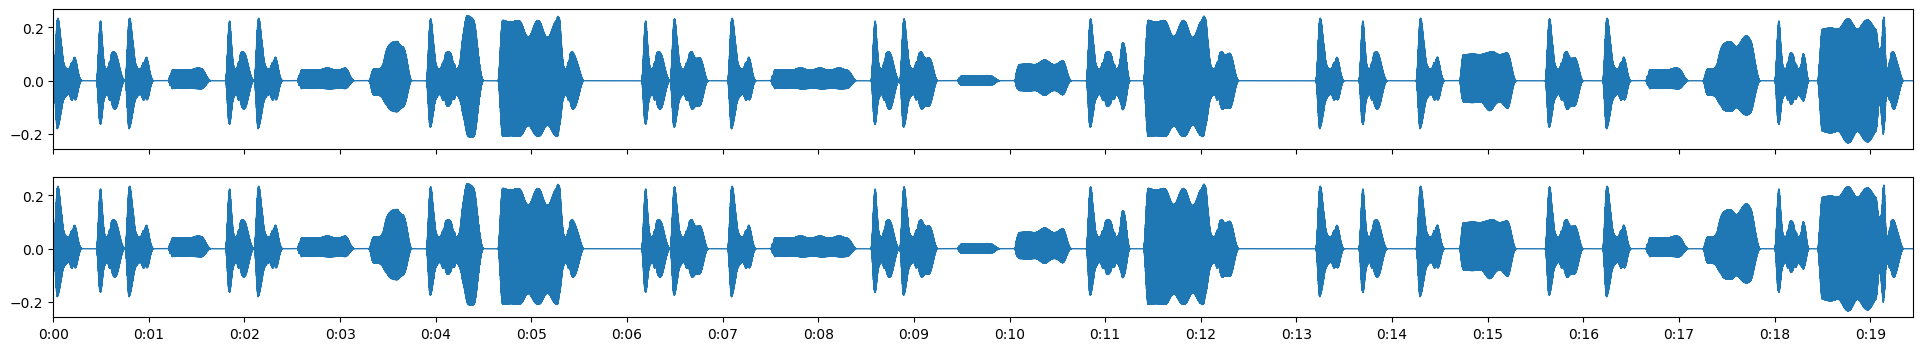

In [52]:
r = ch2.rec(instr='.sing', args={'ivibstart': 0.25, 'kvibfreq': 5.5}, fade=(0.05, 0.1))
r

In [7]:
playSession().defInstr('post', r'''
    |kroomsize=0.6, khfdamp=0.35, igain=1.|
    a1pre, a2pre monitor
    a1, a2 freeverb a1pre, a2pre, kroomsize, khfdamp
    a1 *= igain
    a2 *= igain
    outch 1, a1 - a1pre, 2, a2 - a2pre 
''')
    
with play() as s:
    synth = ch2.play(instr='.sing', args={'ivibstart': 0.25, 'kvibfreq': 5.5}, fade=(0.05, 0.1), gain=3)
    ev = s.sched('post', dur=ch2.durSecs() + 4, priority=2, kroomsize=0.3, khfdamp=0.4)
s
    

Button(description='Stop', style=ButtonStyle())

Output()

OfflineRenderer(sr=44100)
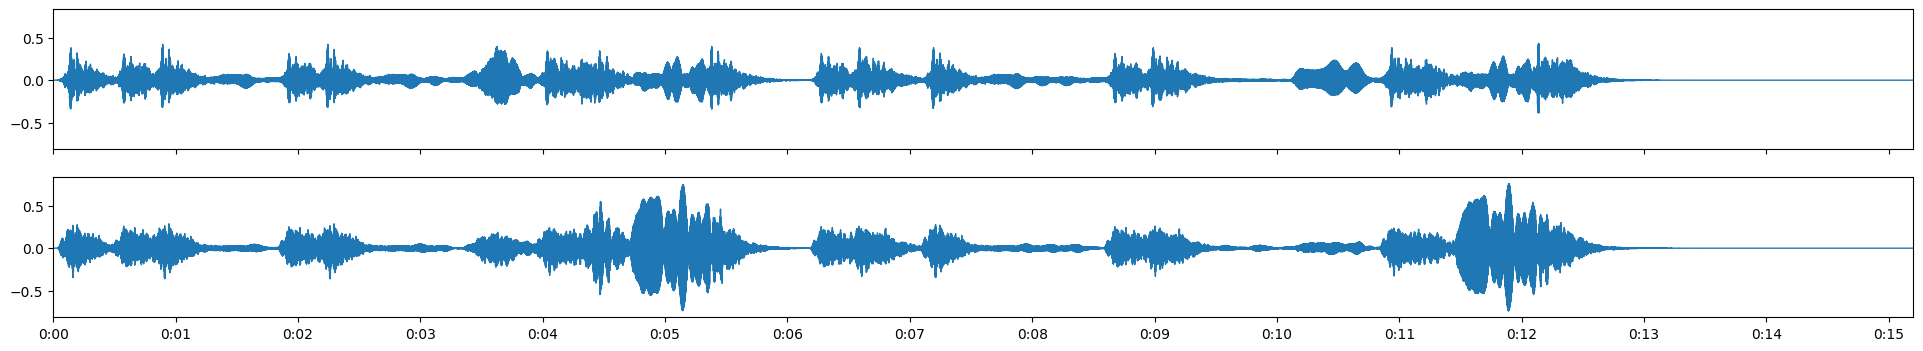

In [17]:
with render() as s:
    ch2.play(instr='.sing', args={'ivibstart': 0.25, 'kvibfreq': 5.5}, fade=(0.05, 0.1), gain=3)
    s.sched('post', dur=ch2.durSecs() + 2, priority=2, kroomsize=0.3, khfdamp=0.5, igain=1.5)
s
    